In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pwd=os.getcwd()
filepath=os.path.join(pwd,"IRIS.csv")
filepath


'c:\\Users\\Shree\\OneDrive\\Desktop\\end to end ml project\\IRIS.csv'

In [3]:
iris_df=pd.read_csv(filepath)
iris_df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


here we want to group all these flowers into different clusters thus lets assume we dont know the species column

<Axes: xlabel='sepal_length', ylabel='petal_length'>

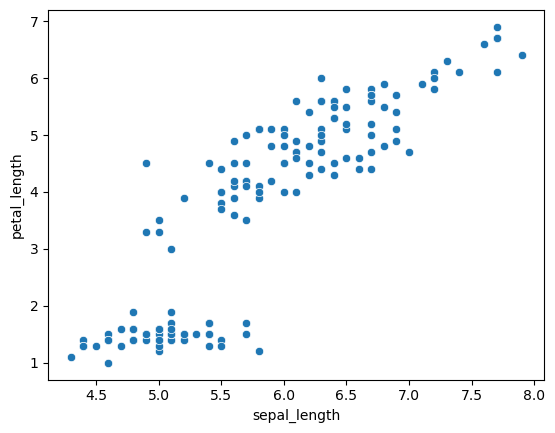

In [4]:
sns.scatterplot(data=iris_df,x='sepal_length',y='petal_length')

<Axes: xlabel='sepal_length', ylabel='petal_width'>

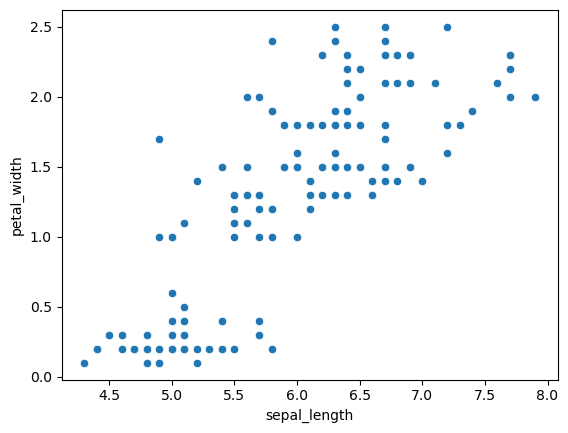

In [5]:
sns.scatterplot(data=iris_df,x='sepal_length',y='petal_width')

thus there might be 3 clusters // note we have 4 features thus we will need a 4-d plot to see data points thus we cant tell how many clusters are needed thus we can take a guess looking at the scatterplots or we can use pca

In [6]:
iris_unsl=iris_df.drop('species',axis=1)


In [7]:
iris_unsl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
iris_df.duplicated().sum()

3

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

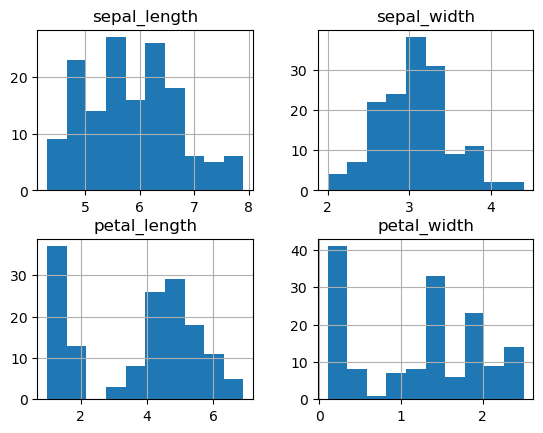

In [9]:
iris_unsl.hist()

thus there are no null values or outliers nor are there categorical data

In [250]:
px.scatter(iris_df,y=iris_df['sepal_width'],x=iris_df['sepal_length'],color=iris_df['species'])

In [10]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=3,random_state=42)

In [11]:
model.fit(iris_unsl)

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [12]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

thus as 4-d data gthe cluster centeres are also 4-d points

In [13]:
cluster_data=pd.DataFrame(columns=list(iris_unsl.columns),data=model.cluster_centers_)

cluster_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


In [14]:
preds=model.predict(iris_unsl)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

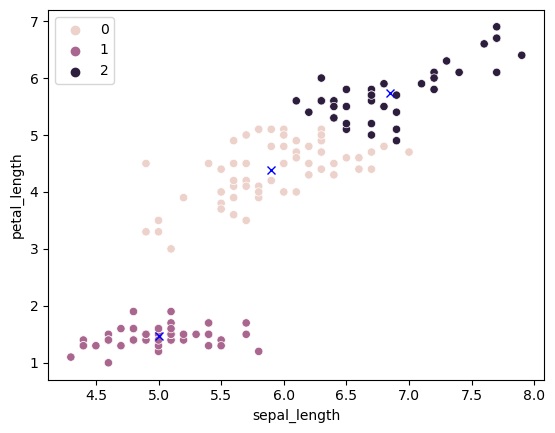

In [15]:
sns.scatterplot(data=iris_unsl,x='sepal_length',y='petal_length',hue=preds)

centers_x,centers_y=model.cluster_centers_[:,0],model.cluster_centers_[:,2]
plt.plot(centers_x,centers_y,'xb')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

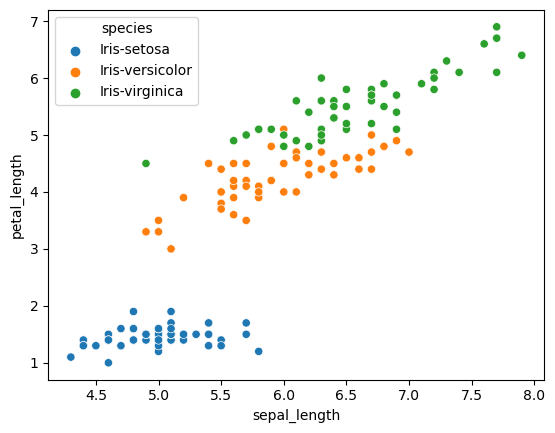

In [16]:
sns.scatterplot(data=iris_df,x='sepal_length',y='petal_length',hue='species')

thus there are 3 clusters

it can aslo be used as a data analysis tool

In [17]:
model.inertia_ # here inertia is cost function error

78.94084142614602

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: K

Text(0, 0.5, 'error')

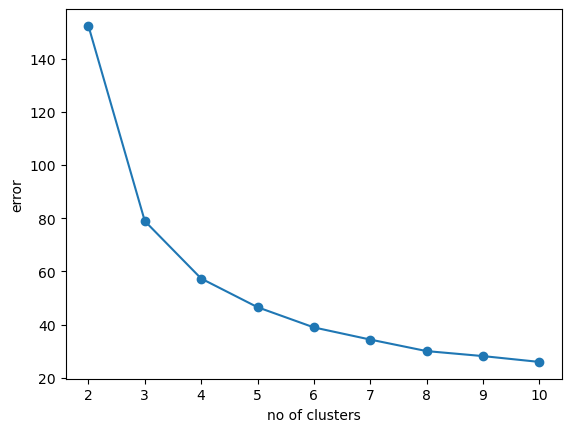

In [18]:
options=range(2,11)
inertias=[]
for n_clusters in options:
    model=KMeans(n_clusters=n_clusters,random_state=42).fit(iris_unsl)
    inertias.append(model.inertia_)

plt.plot(options,inertias,'-o')
plt.xlabel('no of clusters')
plt.ylabel('error')

thus for this data we can use 6 clusters

In [19]:
model=KMeans(n_clusters=6,random_state=42).fit(iris_unsl)

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
preds=model.predict(iris_unsl)
preds

array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 4, 5, 4, 5, 4, 5,
       5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 4, 5, 5, 5,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 1, 5, 2, 1, 1, 2, 4, 2, 1, 2,
       1, 1, 1, 5, 1, 1, 1, 2, 2, 5, 1, 5, 2, 5, 1, 2, 5, 5, 1, 2, 2, 2,
       1, 5, 5, 2, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 5])

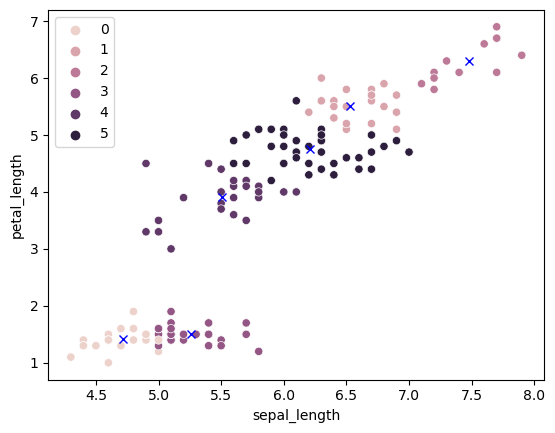

In [21]:
sns.scatterplot(data=iris_unsl,x='sepal_length',y='petal_length',hue=preds)

centers_x,centers_y=model.cluster_centers_[:,0],model.cluster_centers_[:,2]
plt.plot(centers_x,centers_y,'xb')

In [22]:
from sklearn.cluster import DBSCAN

model=DBSCAN(eps=1,min_samples=7)

there sis no prediction in DBSCAN

In [23]:
model.fit(iris_unsl)

DBSCAN(eps=1, min_samples=7)

In [24]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149], dtype=int64)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

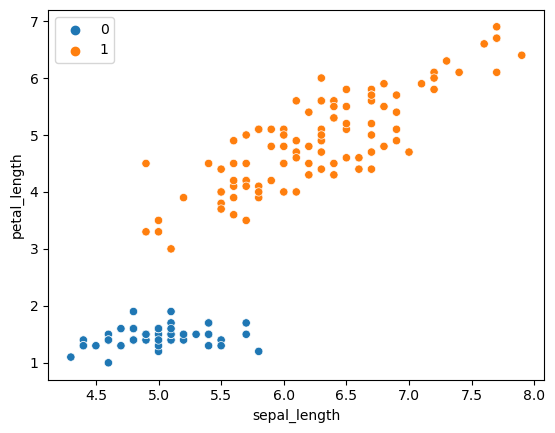

In [26]:
sns.scatterplot(data=iris_unsl,x='sepal_length',y='petal_length',hue=model.labels_)

PCA (Dimensionality reduction)

In [27]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(iris_unsl)

PCA(n_components=2)

In [28]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [29]:
transformed=pca.transform(iris_unsl)

transformed

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

<Axes: >

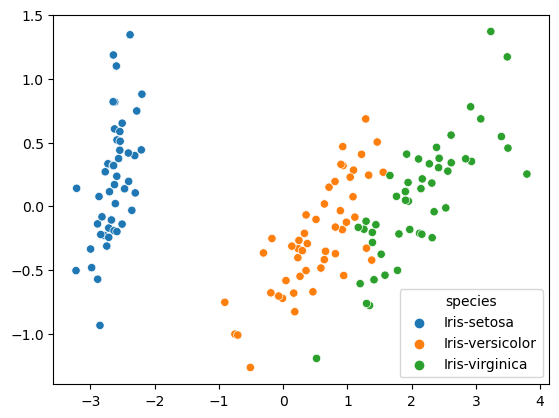

In [30]:
sns.scatterplot(x=transformed[:,0],y=transformed[:,1],hue=iris_df['species'])

now as pc1 captures 95% of the data thus we simply use pc1 to visualise the data 

In [31]:
pca=PCA(n_components=1)

pca.fit(iris_unsl)

transformed=pca.transform(iris_unsl)

<Axes: >

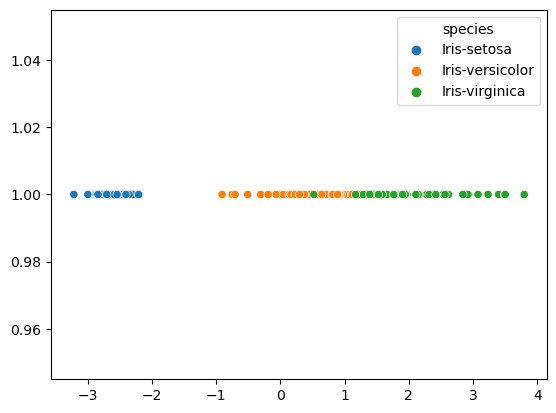

In [32]:
l=len(transformed[:,0])
w=1
y=[w for i in range(l)]
sns.scatterplot(x=transformed[:,0],y=y,hue=iris_df['species'])

obviously this will be a bit less accurate then the 2-D pca plot 

In [33]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='species', ylabel='count'>

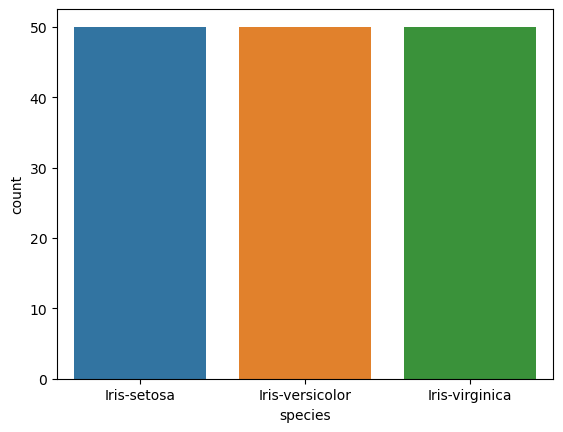

In [35]:

sns.countplot(iris_df,x='species')


In [36]:
from sklearn.preprocessing import StandardScaler
numerical=iris_df.select_dtypes('number').columns
scaler=StandardScaler()

iris_df[numerical]=scaler.fit_transform(iris_df[numerical])

In [37]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [45]:
from sklearn.preprocessing import LabelEncoder

labeler=LabelEncoder()

iris_df['species']=labeler.fit_transform(iris_df['species'])

In [50]:
labeler.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [51]:
iris_df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

thus we want to know predict wether a flower is 'Iris-virginica' or not 

In [54]:
y=iris_df['species']==2
y

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [59]:
x=iris_df[numerical]

In [154]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

model=LogisticRegression()

model.fit(x,y)

LogisticRegression()

In [61]:
model.score(x,y)

0.9733333333333334

In [146]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,x,y,cv=10).mean()

0.9533333333333334

In [144]:
def cv_val(model,x,y):
    scores=[]
    itter=[]
    for i in range(98):
        scores.append(cross_val_score(model,x,y,cv=i+2).mean())
        itter.append(i+2)
    plt.plot(itter,scores)


In [147]:
from sklearn.model_selection import cross_val_predict

preds= cross_val_predict(model, x, y, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y,preds)


array([[95,  5],
       [ 2, 48]], dtype=int64)

In [151]:
from sklearn.metrics import precision_score,recall_score,f1_score

precision_score(y,preds)

0.9056603773584906

In [152]:
recall_score(y,preds)

0.96

In [153]:
f1_score(y,preds)

0.9320388349514563

In [156]:
sgd=SGDClassifier(random_state=42)
sgd.fit(x,y)

SGDClassifier(random_state=42)

In [157]:
sgd.score(x,y)

0.9733333333333334

In [161]:
cross_val_score(sgd,x,y).mean()

0.9533333333333334

In [162]:
sgd_preds= cross_val_predict(sgd, x, y, cv=3)

In [163]:
precision_score(y,sgd_preds)

0.8958333333333334

In [164]:
recall_score(y,sgd_preds)

0.86

In [165]:
f1_score(y,sgd_preds)

0.8775510204081632

In [167]:
y_scores=cross_val_predict(sgd,x,y,cv=3,method='decision_function')
y_scores

array([-127.83519211, -119.01850091, -121.87373109, -115.70942066,
       -128.30152863, -124.04385458, -118.62326639, -123.59343883,
       -112.99358557, -121.67572045, -131.47745701, -119.81802207,
       -121.27908148, -122.41460393, -145.12914665, -137.6320899 ,
       -131.7340832 , -124.64818173, -128.61738805, -126.90392353,
       -123.45404374, -122.32414684, -132.28603803, -109.72095687,
       -114.0503506 , -116.0998164 , -115.29686092, -126.83906476,
       -127.3688556 , -116.10605962, -115.63972311, -120.9251373 ,
       -138.38267305, -141.29027556, -105.08708243, -107.90627093,
       -111.33667128, -105.08708243,  -99.48210835, -103.26802038,
       -101.9286039 ,  -98.95796783,  -98.98499026,  -86.23263424,
        -88.25527018,  -99.01279416, -100.49651708,  -99.58906098,
       -104.9036811 , -104.10317763,  -28.05862687,  -21.01442482,
        -20.10725998,  -28.33121707,  -21.4220628 ,  -20.58342406,
        -12.56593984,  -43.74368264,  -29.2736182 ,  -22.08751

In [171]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.98, 0.98,
       0.98, 0.96, 0.96, 0.96, 0.96, 0.94, 0.92, 0.92, 0.9 , 0.88, 0.88,
       0.88, 0.88, 0.86, 0.84, 0.82, 0.8 , 0.78, 0.78, 0.76, 0.74, 0.72,
       0.72, 0.7 , 0.68, 0.66, 0.66, 0.64, 0.62, 0.62, 0.6 , 0.58, 0.58,
       0.56, 0.54, 0.52, 0.5 , 0.48, 0.46, 0.44, 0.42, 0.4 , 0.38, 0.36,
       0.34, 0.32, 0.3 , 0.28, 0.26, 0.24, 0.22, 0.2 , 0.18, 0.16, 0.14,
       0.12, 0.1 , 0.08, 0.06, 0.04, 0.02, 0.  ])

In [179]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds ):
    plt.plot(thresholds,precisions[:-1],"b--", label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--", label="Recall")
    plt.grid()
    plt.legend()

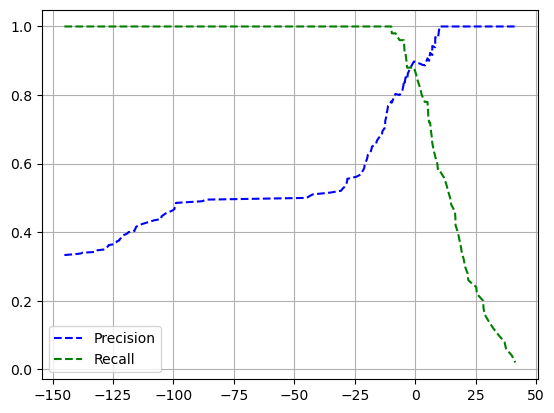

In [180]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

thus depending on what precision and recall you want u can look at the graph and choose the threshold

now we want our prescion to be high as we want to try to predict our flowers as 'Iris-virginica' but recall should not be low 

thus at threshhold=0 we are getting a good recall and prescion

In [190]:
threshold=0
y_scores=cross_val_predict(model,x,y,cv=3,method='decision_function')
preds=(y_scores>=0)

In [191]:
precision_score(y,preds)

0.9056603773584906

In [192]:
recall_score(y,preds)

0.96

In [193]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)

In [194]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') 

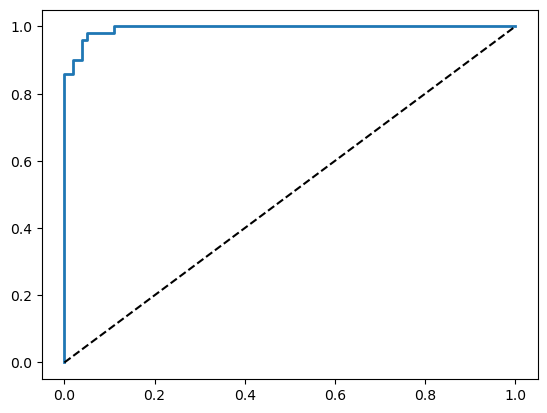

In [195]:
plot_roc_curve(fpr, tpr)

softmax regression

In [230]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

softmax_reg=LogisticRegression(multi_class='multinomial')
y=iris_df['species']
x=iris_df[['sepal_length','sepal_width']]
softmax_reg.fit(x,y)

LogisticRegression(multi_class='multinomial')

In [231]:
softmax_reg.score(x,y)

0.8133333333333334

In [232]:
cross_val_score(softmax_reg,x,y).mean()

0.8133333333333332

In [233]:
softmax_reg.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [234]:
cross_val_predict(softmax_reg,x,y,cv=10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [235]:
from sklearn.inspection import DecisionBoundaryDisplay


feature_1, feature_2 = np.meshgrid(
    np.linspace(iris_df['sepal_length'].min(),iris_df['sepal_length'].max()),
    np.linspace(iris_df['sepal_width'].min(),iris_df['sepal_width'].max())
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T


y_pred=y_pred = np.reshape(softmax_reg.predict(grid), feature_1.shape)

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

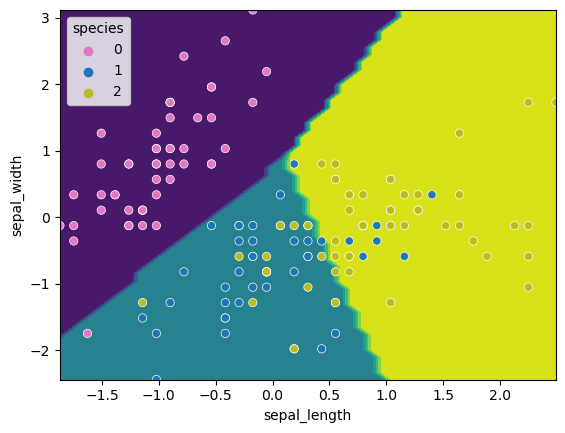

In [274]:
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

sns.scatterplot(iris_df,x=iris_df['sepal_length'],y=iris_df['sepal_width'],hue=iris_df['species'],palette=["C6", "C10", "C8"])



In [275]:
y=iris_df['species']
x=iris_df[numerical]
softmax_reg.fit(x,y)

LogisticRegression(multi_class='multinomial')

In [279]:
preds= cross_val_predict(softmax_reg, x, y, cv=3)
conf_mx=confusion_matrix(y,preds)
conf_mx

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

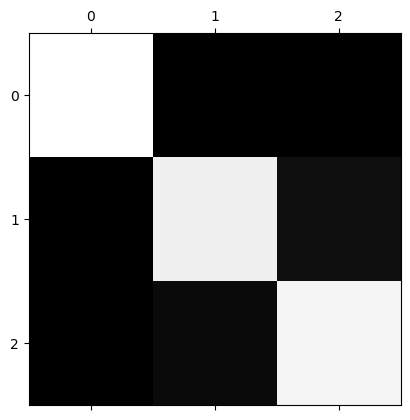

In [280]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

now most of are classificatio i on the diagnal thus our classification is good